In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward 
from dnn_app_utils_v2 import *


In [2]:
def buliding_training_set(N):
    x_dataframe = pd.DataFrame()
    y_ndarray = np.empty((1, N),dtype = int)
    for i in range(1, N + 1):
        data_dict = pd.read_excel('training_dataset.xlsx', sheet_name = "Sheet" + str(i), nrows = 4900)
        x1 = data_dict.iloc[:, 0]
        x2 = data_dict.iloc[:, 1]
        x3 = data_dict.iloc[:, 2]
        x_data = pd.concat([x1, x2, x3])
        x_dataframe = pd.concat([x_dataframe, x_data], axis = 1)
        y = data_dict.iloc[0, 3]
        y_ndarray[0,i - 1] = y

    x_ndarray = x_dataframe.values
    
    assert (x_ndarray.shape == (3 * data_dict.shape[0], N))
    assert (y_ndarray.shape == (1, N))
    
    return x_ndarray, y_ndarray

In [3]:
#Training dataset
N = 32
x_ndarray, y_ndarray = buliding_training_set(N)

#Normalization
train_x = x_ndarray / np.max(x_ndarray)
train_y = y_ndarray

print("Training set dimension:" + str(train_x.shape))
print("Number of training set samples：" + str(train_x.shape[1]))

Training Set Dimension:(14700, 32)
Number of training set samples：32


In [7]:
#DANNs 

def initialize_parameters_deep(layer_dims):
    
    parameters = {}
    L = len(layer_dims)
    
    for i in range(1, L):
        np.random.seed(1)
        parameters['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i - 1]) / np.sqrt(layers_dims[i - 1])
        parameters["b" + str(i)] = np.zeros((layer_dims[i], 1))
        
        assert((layer_dims[i], layer_dims[i - 1]) == parameters["W" + str(i)].shape)
        assert((layer_dims[i], 1) == parameters["b" + str(i)].shape)
        
    return parameters

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for i in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(i)], parameters["b" + str(i)], "relu")
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1]))
    
    return AL, caches

def compute_cost(AL, Y):
    m = Y.shape[1]
    
    cost = -(np.dot(np.log(AL), Y.T) + np.dot(np.log(1 - AL), (1 - Y).T)) / (m * 1.0)
    cost = np.squeeze(cost)

    assert(cost.shape == ( ))
    return cost

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L - 1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid")
    
    for i in reversed(range(L - 1)):
        current_cache = caches[i]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(i + 2)], current_cache, activation="relu")
        grads["dA" + str(i + 1)] = dA_prev_temp
        grads["dW" + str(i + 1)] = dW_temp
        grads["db" + str(i + 1)] = db_temp
        
    return grads

def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    for i in range(1, L + 1):
        parameters["W" + str(i)] -= learning_rate * grads["dW" + str(i)]
        parameters["b" + str(i)] -= learning_rate * grads["db" + str(i)]
    
    return parameters

In [5]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0020, num_iterations = 20000, print_cost = False):

    costs = []

    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)

        cost = compute_cost(AL, Y)

        grads = L_model_backward(AL, Y, caches)


        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 500 == 0:
            print ("iterations %i，cost: %f" %(i, cost))
        if print_cost and i % 1 == 0:
            costs.append(cost)
        if i > 1 and i % (num_iterations - 1) == 0:
            print("final cost = %f" %(cost))
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs

iterations 0，cost: 0.701704
iterations 500，cost: 0.395068
iterations 1000，cost: 0.338248
iterations 1500，cost: 0.323914
iterations 2000，cost: 0.316907
iterations 2500，cost: 0.315263
iterations 3000，cost: 0.313899
iterations 3500，cost: 0.313695
iterations 4000，cost: 0.313685
iterations 4500，cost: 0.313382
iterations 5000，cost: 0.313123
iterations 5500，cost: 0.313204
iterations 6000，cost: 0.313073
iterations 6500，cost: 0.313070
iterations 7000，cost: 0.312974
iterations 7500，cost: 0.313077
iterations 8000，cost: 0.312989
iterations 8500，cost: 0.312991
iterations 9000，cost: 0.313035
iterations 9500，cost: 0.312972
iterations 10000，cost: 0.312890
iterations 10500，cost: 0.313044
iterations 11000，cost: 0.312862
iterations 11500，cost: 0.312853
iterations 12000，cost: 0.312845
iterations 12500，cost: 0.312879
iterations 13000，cost: 0.312843
iterations 13500，cost: 0.312859
iterations 14000，cost: 0.312826
iterations 14500，cost: 0.312841
iterations 15000，cost: 0.312843
iterations 15500，cost: 0.312828


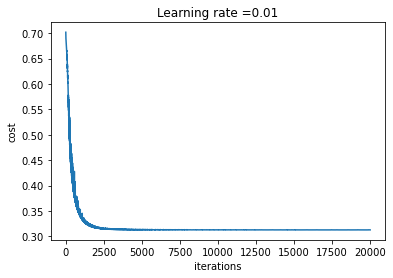

Time Used：0:00:51.281754
iterations 0，cost: 0.701704
iterations 500，cost: 0.204705
iterations 1000，cost: 0.117280
iterations 1500，cost: 0.088542
iterations 2000，cost: 0.069946
iterations 2500，cost: 0.055232
iterations 3000，cost: 0.043991
iterations 3500，cost: 0.036303
iterations 4000，cost: 0.029770
iterations 4500，cost: 0.025204
iterations 5000，cost: 0.021361
iterations 5500，cost: 0.018304
iterations 6000，cost: 0.015850
iterations 6500，cost: 0.014021
iterations 7000，cost: 0.012392
iterations 7500，cost: 0.011034
iterations 8000，cost: 0.009872
iterations 8500，cost: 0.008970
iterations 9000，cost: 0.008110
iterations 9500，cost: 0.007447
iterations 10000，cost: 0.006843
iterations 10500，cost: 0.006292
iterations 11000，cost: 0.005849
iterations 11500，cost: 0.005420
iterations 12000，cost: 0.005060
iterations 12500，cost: 0.004742
iterations 13000，cost: 0.004440
iterations 13500，cost: 0.004179
iterations 14000，cost: 0.003942
iterations 14500，cost: 0.003721
iterations 15000，cost: 0.003527
iterati

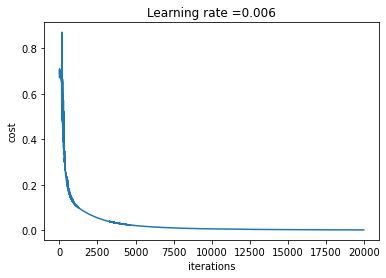

Time Used：0:00:51.102627
iterations 0，cost: 0.701704
iterations 500，cost: 0.633972
iterations 1000，cost: 0.207720
iterations 1500，cost: 0.108019
iterations 2000，cost: 0.066536
iterations 2500，cost: 0.043498
iterations 3000，cost: 0.030094
iterations 3500，cost: 0.021945
iterations 4000，cost: 0.016667
iterations 4500，cost: 0.013103
iterations 5000，cost: 0.010597
iterations 5500，cost: 0.008762
iterations 6000，cost: 0.007380
iterations 6500，cost: 0.006316
iterations 7000，cost: 0.005478
iterations 7500，cost: 0.004807
iterations 8000，cost: 0.004260
iterations 8500，cost: 0.003808
iterations 9000，cost: 0.003431
iterations 9500，cost: 0.003112
iterations 10000，cost: 0.002840
iterations 10500，cost: 0.002606
iterations 11000，cost: 0.002402
iterations 11500，cost: 0.002225
iterations 12000，cost: 0.002069
iterations 12500，cost: 0.001931
iterations 13000，cost: 0.001808
iterations 13500，cost: 0.001698
iterations 14000，cost: 0.001599
iterations 14500，cost: 0.001509
iterations 15000，cost: 0.001429
iterati

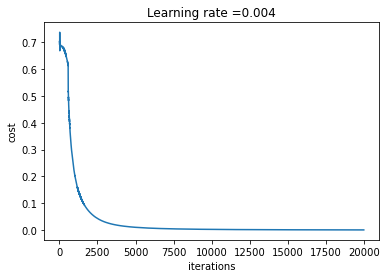

Time Used：0:00:57.869821
iterations 0，cost: 0.701704
iterations 500，cost: 0.368118
iterations 1000，cost: 0.264653
iterations 1500，cost: 0.207378
iterations 2000，cost: 0.167060
iterations 2500，cost: 0.135080
iterations 3000，cost: 0.108870
iterations 3500，cost: 0.087388
iterations 4000，cost: 0.070042
iterations 4500，cost: 0.056478
iterations 5000，cost: 0.045872
iterations 5500，cost: 0.037696
iterations 6000，cost: 0.031356
iterations 6500，cost: 0.026396
iterations 7000，cost: 0.022478
iterations 7500，cost: 0.019350
iterations 8000，cost: 0.016825
iterations 8500，cost: 0.014765
iterations 9000，cost: 0.013065
iterations 9500，cost: 0.011646
iterations 10000，cost: 0.010452
iterations 10500，cost: 0.009439
iterations 11000，cost: 0.008572
iterations 11500，cost: 0.007826
iterations 12000，cost: 0.007179
iterations 12500，cost: 0.006615
iterations 13000，cost: 0.006119
iterations 13500，cost: 0.005681
iterations 14000，cost: 0.005292
iterations 14500，cost: 0.004945
iterations 15000，cost: 0.004634
iterati

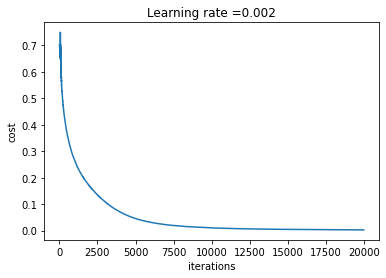

Time Used：0:00:54.102015
iterations 0，cost: 0.701704
iterations 500，cost: 0.387127
iterations 1000，cost: 0.305204
iterations 1500，cost: 0.255988
iterations 2000，cost: 0.220183
iterations 2500，cost: 0.193123
iterations 3000，cost: 0.170976
iterations 3500，cost: 0.151968
iterations 4000，cost: 0.135605
iterations 4500，cost: 0.121217
iterations 5000，cost: 0.108497
iterations 5500，cost: 0.097227
iterations 6000，cost: 0.087215
iterations 6500，cost: 0.078322
iterations 7000，cost: 0.070377
iterations 7500，cost: 0.063327
iterations 8000，cost: 0.057075
iterations 8500，cost: 0.051535
iterations 9000，cost: 0.046659
iterations 9500，cost: 0.042341
iterations 10000，cost: 0.038531
iterations 10500，cost: 0.035166
iterations 11000，cost: 0.032187
iterations 11500，cost: 0.029553
iterations 12000，cost: 0.027208
iterations 12500，cost: 0.025119
iterations 13000，cost: 0.023256
iterations 13500，cost: 0.021592
iterations 14000，cost: 0.020103
iterations 14500，cost: 0.018759
iterations 15000，cost: 0.017546
iterati

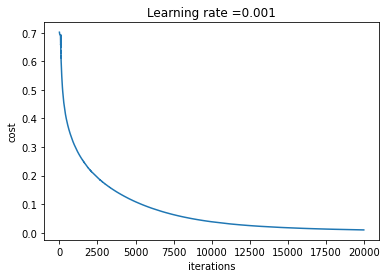

Time Used：0:00:52.210454


In [8]:
layers_dims = [14700, 8, 3, 1]

time1 = datetime.datetime.now()
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0100, num_iterations = 20000, print_cost = True)
time2 = datetime.datetime.now()
original_costs = np.zeros(np.squeeze(costs).shape)
original_costs = np.column_stack((original_costs, costs))
print("Time Used：" + str(time2 - time1))

time1 = datetime.datetime.now()
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0060, num_iterations = 20000, print_cost = True)
time2 = datetime.datetime.now()
original_costs = np.column_stack((original_costs, costs))
print("Time Used：" + str(time2 - time1))

time1 = datetime.datetime.now()
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0040, num_iterations = 20000, print_cost = True)
time2 = datetime.datetime.now()
original_costs = np.column_stack((original_costs, costs))
print("Time Used：" + str(time2 - time1))

time1 = datetime.datetime.now()
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0020, num_iterations = 20000, print_cost = True)
time2 = datetime.datetime.now()
original_costs = np.column_stack((original_costs, costs))
print("Time Used：" + str(time2 - time1))

time1 = datetime.datetime.now()
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0010, num_iterations = 20000, print_cost = True)
time2 = datetime.datetime.now()
original_costs = np.column_stack((original_costs, costs))
print("Time Used：" + str(time2 - time1))


In [ ]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1, m))
    
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(probas.shape[1]):
        print("Number%i, predictive value: %f" %(i + 1, probas[0,i]))
        if probas[0,i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
                
    print("Accuracy rate :" + str(np.sum(p == y) * 100 / (1.0 * m)))
    
    return p

In [ ]:
pred_train = predict(train_x, train_y, parameters)

In [ ]:
#定义测试集集函数
def buliding_test_set(T):
    x_dataframe = pd.DataFrame()
    y_test_ndarray = np.empty((1, T), dtype = int)
    for i in range(1, T + 1):
        data_dict = pd.read_excel('testing_dataset.xlsx', sheet_name = "Sheet" + str(i), nrows = 4900)
        x1 = data_dict.iloc[:, 0]
        x2 = data_dict.iloc[:, 1]
        x3 = data_dict.iloc[:, 2]
        x_data = pd.concat([x1, x2, x3])
        x_dataframe = pd.concat([x_dataframe, x_data], axis = 1)
        y = data_dict.iloc[0, 3]
        y_test_ndarray[0,i - 1] = y

    x_test_ndarray = x_dataframe.values

    assert (x_test_ndarray.shape == (3 * data_dict.shape[0], T))
    assert (y_test_ndarray.shape == (1, T))

    return x_test_ndarray, y_test_ndarray

In [ ]:
#Testing dataset
T = 8
x_test_ndarray, y_test_ndarray = buliding_test_set(T)
print("Testing dataset dimension" + str(x_test_ndarray.shape))

#Normalization
x_test = x_test_ndarray / np.max(x_test_ndarray)
y_test = y_test_ndarray

In [ ]:
time1 = datetime.datetime.now()
pred_test = predict(x_test, y_test, parameters)
time.sleep(3)
time2 = datetime.datetime.now()
print(time2 - time1)